# Tuần 1 NaiveBayes

## Phân loại loài hoa Iris bằng Gaussian Naive Bayes
Trong notebook này, chúng ta sẽ:

1. Đọc dữ liệu Iris.
2. Trực quan hóa dữ liệu (scatter plot).
3. Chia dữ liệu thành tập huấn luyện và tập kiểm tra.
4. Huấn luyện mô hình Gaussian Naïve Bayes.
5. Đánh giá mô hình bằng Accuracy, Precision, Recall, F1-score và Confusion Matrix.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, \
    precision_score, recall_score, f1_score

### Chuẩn bị dữ liệu và trực quan hóa dữ liệu

- Dataset Iris gồm 150 mẫu, 4 đặc trưng: sepal_length, sepal_width, petal_length, petal_width.
- 3 lớp (species): setosa, versicolor, virginica.
- Đổi tên cột để dễ thao tác.

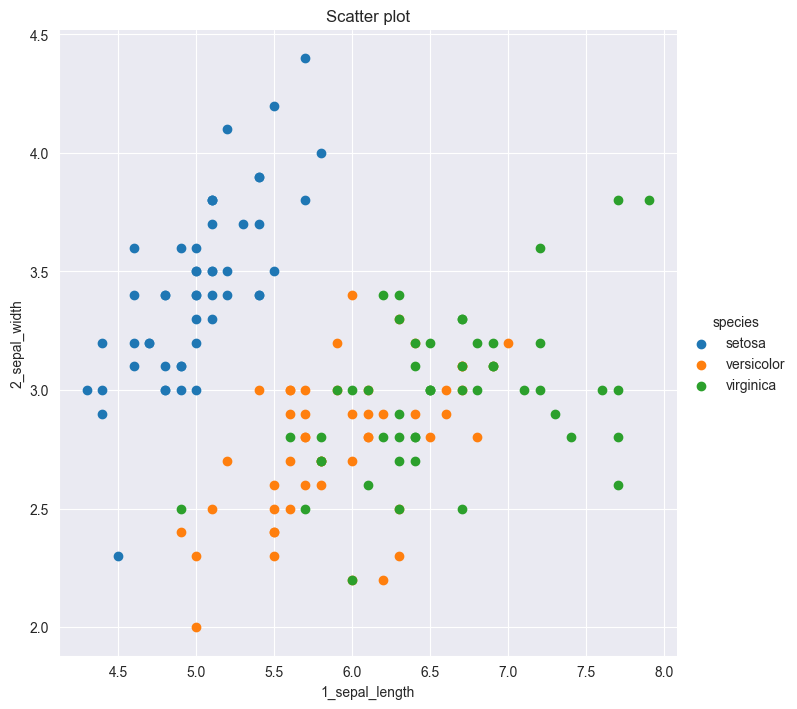

In [2]:
iris = sns.load_dataset("iris")
iris = iris.rename(columns={
    'sepal_length': '1_sepal_length',
    'sepal_width' : '2_sepal_width',
    'petal_length': '3_petal_length',
    'petal_width' : '4_petal_width'
})
sns.FacetGrid(iris, hue="species", height=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", ) .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width","3_petal_length", "4_petal_width",'species']]

### Chia dữ liệu Train/Test

- Dùng `train_test_split` với tỷ lệ 80/20.
- Dùng `stratify=y` để đảm bảo mỗi lớp đều có tỉ lệ giống nhau trong train và test.

In [3]:
X = np.array(df1.iloc[:,0:4])
y = df1.iloc[:,4].replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy().infer_objects(copy = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8388\75796548.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df1.iloc[:,4].replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy().infer_objects(copy = False)


### Huấn luyện mô hình Gaussian Naïve Bayes

- Sử dụng `GaussianNB()` từ scikit-learn.
- Dữ liệu huấn luyện là các đặc trưng số liên tục (float).
- Dự đoán nhãn cho tập test.

In [4]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Đánh giá mô hình

- Accuracy: Tỉ lệ dự đoán đúng trên tổng số mẫu.
- Precision: Trong số các mẫu dự đoán là 1 lớp, có bao nhiêu đúng.
- Recall: Trong số các mẫu thực sự thuộc lớp đó, mô hình dự đoán đúng bao nhiêu.
- F1-score: Trung bình hài hòa giữa precision và recall.
- Confusion matrix: Ma trận thể hiện chi tiết số dự đoán đúng/sai cho từng lớp.


model evaluation: 
accuracy: 0.9667
precision: 0.9697
recall: 0.9667
f1-score: 0.9666


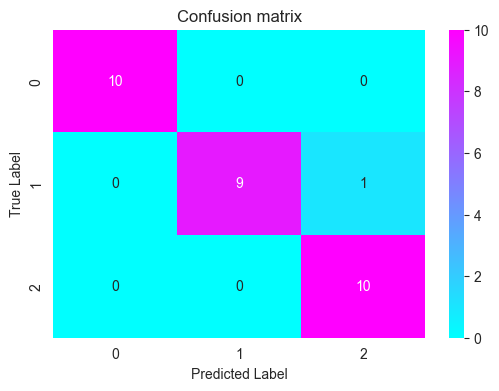

In [5]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("model evaluation: ")
print(f"accuracy: {acc:.4f}")
print(f"precision: {prec:.4f}")
print(f"recall: {rec:.4f}")
print(f"f1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

## Phân loại ung thư vú

Trong notebook này chúng ta sẽ:

1. Đọc dữ liệu Breast Cancer Wisconsin
2. Xử lý giá trị thiếu (bare_nuclei)
3. Chia Train/Test (80 benign, 40 malignant)
4. Huấn luyện Gaussian Naïve Bayes
5. Đánh giá Accuracy, Precision, Recall

In [7]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix


### 1. Đọc dữ liệu

- File `breast-cancer-wisconsin.data` chứa 11 cột:
    1. `id`: mã số mẫu
    2. `class`: 2 = lành tính (benign), 4 = ác tính (malignant)
    3–11: các đặc trưng hình thái tế bào (clump_thickness, cell_size, ...)

- Một số giá trị trong cột `bare_nuclei` được ghi là `"?"`.
- Khi đọc dữ liệu:
    - Sử dụng `na_values='?'` để tự động chuyển `"?"` thành NaN.
    - Đảm bảo tất cả các cột số đều có kiểu dữ liệu numeric.

In [10]:
cols = [
    "id", "clump_thickness", "cell_size", "cell_shape", "marginal_adhesion",
    "single_epithelial_size", "bare_nuclei", "bland_chromatin",
    "normal_nucleoli", "mitoses", "class"
]

data = pd.read_csv(
    r"breast-cancer-wisconsin.data",
    header=None,
    names=cols,
    na_values='?'
)
data

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


### 2. Xử lý giá trị thiếu (Missing Value)

- Cột `bare_nuclei` có một số giá trị bị thiếu hoặc ghi `"?"`.
- Các bước xử lý:
    1. Chuyển `"?"` thành `NaN` (đã làm khi đọc file với `na_values='?'`).
    2. Xử lý NaN:
        - Có thể **xóa dòng chứa NaN**: `data.dropna()`.
        - Hoặc **thay bằng giá trị median**: `data['bare_nuclei'].fillna(data['bare_nuclei'].median())`.
    3. Chuyển kiểu dữ liệu sang `float` hoặc `int` để phù hợp với mô hình Gaussian Naïve Bayes.

In [13]:
data = data.dropna().reset_index(drop=True)
data['bare_nuclei'] = data['bare_nuclei'].astype(float)
data

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2.0,1,1,1,2
679,841769,2,1,1,1,2,1.0,1,1,1,2
680,888820,5,10,10,3,7,3.0,8,10,2,4
681,897471,4,8,6,4,3,4.0,10,6,1,4


### 3. Chuẩn bị dữ liệu

- Tách **X (features)** và **y (labels)**:
    - `X` chứa tất cả các cột đặc trưng, bỏ `id` và `class`.
    - `y` là nhãn lớp: 2 = lành tính, 4 = ác tính.
- Dữ liệu numeric, liên tục → phù hợp với Gaussian Naïve Bayes.

In [14]:
X = data.drop(columns=["id", "class"]).values
y = data["class"].values

### 4. Chia dữ liệu Train/Test

- Yêu cầu: chọn **ngẫu nhiên** 80 mẫu lành tính và 40 mẫu ác tính làm Test.
- Phần còn lại làm Train.
- Lý do chọn ngẫu nhiên: tránh bias, đảm bảo dữ liệu Test đại diện cho tập tổng thể.
- Sử dụng `sample()` của pandas để lấy mẫu ngẫu nhiên.

In [15]:
test_benign = data[data["class"] == 2].sample(80, random_state=42)
test_malignant = data[data["class"] == 4].sample(40, random_state=42)
test_idx = test_benign.index.union(test_malignant.index)
X_test = X[test_idx]
y_test = y[test_idx]
train_idx = data.index.difference(test_idx)
X_train = X[train_idx]
y_train = y[train_idx]

### 5. Huấn luyện Gaussian Naïve Bayes

- Sử dụng `GaussianNB()` từ `sklearn`.
- Lý do dùng GaussianNB:
    - Dữ liệu numeric, liên tục.
    - GaussianNB giả định mỗi đặc trưng tuân theo phân phối Gaussian.
- Huấn luyện trên tập Train và dự đoán trên tập Test.

In [16]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


### 6. Đánh giá mô hình

- **Accuracy**: Tỉ lệ dự đoán đúng trên tổng số mẫu Test.
- **Precision (Malignant)**: Trong số các mẫu dự đoán là ác tính, có bao nhiêu dự đoán đúng.
- **Recall (Malignant)**: Trong số các mẫu ác tính thật sự, mô hình dự đoán đúng bao nhiêu.
- **Confusion Matrix**: Ma trận [[TN, FP], [FN, TP]] hiển thị số dự đoán đúng/sai chi tiết.
- Có thể dùng thêm `classification_report` để hiển thị precision, recall, f1-score cho cả 2 lớp.

In [17]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=4)
rec = recall_score(y_test, y_pred, pos_label=4)
print("=== Kết quả đánh giá ===")
print("Accuracy:", acc)
print("Precision (Malignant):", prec)
print("Recall (Malignant):", rec)
print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred, target_names=["Benign (2)", "Malignant (4)"]))

=== Kết quả đánh giá ===
Accuracy: 0.9666666666666667
Precision (Malignant): 0.9285714285714286
Recall (Malignant): 0.975

Báo cáo chi tiết:
               precision    recall  f1-score   support

   Benign (2)       0.99      0.96      0.97        80
Malignant (4)       0.93      0.97      0.95        40

     accuracy                           0.97       120
    macro avg       0.96      0.97      0.96       120
 weighted avg       0.97      0.97      0.97       120



## Phân loại loại món ăn (cuisine) với Multinomial Naïve Bayes

Trong notebook này, chúng ta sẽ thực hiện các bước sau:

1. Đọc dữ liệu từ file `multinomial_nb_orders.csv`.
2. Tách đặc trưng và nhãn.
3. Mã hóa One-Hot cho dữ liệu (do dữ liệu là categorical/text).
4. Chia dữ liệu thành tập Train/Test (tỉ lệ 70:30).
5. Huấn luyện mô hình Multinomial Naïve Bayes.
6. Dự đoán loại cuisine trên tập Test.
7. Đánh giá mô hình bằng Accuracy và báo cáo chi tiết.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


### 1. Đọc dữ liệu

- File `multinomial_nb_orders.csv` chứa thông tin các nguyên liệu (ingredients) và loại món ăn (`cuisine`).
- Dùng `pd.read_csv()` để đọc file vào pandas DataFrame.
- Kiểm tra các cột và vài dòng đầu tiên để hiểu cấu trúc dữ liệu.


In [15]:
file_path = "multinomial_nb_orders.csv"
data = pd.read_csv(file_path)
data

,cuisine,city,device,user_segment,promo,fav_ingredient,spice_level,day_of_week,price_bucket
0,american,city_16,web,new,promo_1,onion,hot,Wed,high
1,thai,city_10,ios,family,promo_7,cilantro,mild,Wed,mid
2,american,city_18,ios,student,promo_1,cheese,hot,Fri,mid
3,japanese,city_10,web,family,promo_3,ginger,mild,Tue,high
4,vietnamese,city_10,web,family,none,fish_sauce,mild,Wed,low
...,...,...,...,...,...,...,...,...,...
2995,american,city_11,android,returning,promo_1,lemon,none,Fri,high
2996,mexican,city_20,desktop_app,student,promo_1,chili,medium,Wed,mid
2997,indian,city_10,tablet,new,promo_6,onion,hot,Sat,mid
2998,vietnamese,city_8,ios,vip,promo_7,garlic,hot,Wed,low


### 2. Tách đặc trưng (X) và nhãn (y)

- `X`: tất cả các cột đặc trưng (thường là các nguyên liệu), bỏ cột `cuisine`.
- `y`: cột nhãn `cuisine`, mô tả loại món ăn của từng mẫu.

In [58]:
target_feature = "cuisine"   # nhãn (label)
X = df.drop(columns=[target_feature])
y = df[target_feature]

### 3. Mã hóa One-Hot

- MultinomialNB yêu cầu dữ liệu **dạng số** và **không hiểu dữ liệu dạng text/categorical trực tiếp**.
- Nếu chuyển trực tiếp thành số nguyên, mô hình sẽ hiểu nhầm là có thứ tự hoặc khoảng cách giữa các giá trị.
- Do đó, ta dùng `OneHotEncoder()` để biến mỗi nguyên liệu thành **vector nhị phân** (0/1) thể hiện có/không xuất hiện.

In [59]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)
encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le### 4. Chia dữ liệu Train/Test

- Tỉ lệ: 70% Train, 30% Test.
- Sử dụng `stratify=y` để đảm bảo mỗi loại cuisine đều giữ tỉ lệ tương ứng trong Train và Test.
- `random_state=42` để kết quả có thể tái lập.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

### 5. Huấn luyện Multinomial Naïve Bayes

- Sử dụng `MultinomialNB()` từ sklearn.
- Mô hình phù hợp với **dữ liệu dạng đếm hoặc binary** (như số lần xuất hiện nguyên liệu hoặc có/không).
- Huấn luyện trên tập Train và dự đoán trên tập Test.

In [61]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### 6. Dự đoán và đánh giá

- `y_pred = model.predict(X_test)` để dự đoán loại món ăn.
- So sánh kết quả dự đoán với giá trị thực tế.
- Các chỉ số đánh giá:
    - **Accuracy**: tỉ lệ dự đoán đúng trên tổng số mẫu.
    - **Classification report**: precision, recall, f1-score cho từng loại cuisine.

In [62]:
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    print(f"Mẫu {i+1}: Dự đoán = {y_pred[i]}, Thực tế = {y_test[i]}, Đúng? {y_pred[i] == y_test[i]}")

print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred))

Mẫu 1: Dự đoán = 9, Thực tế = 8, Đúng? False
Mẫu 2: Dự đoán = 9, Thực tế = 7, Đúng? False
Mẫu 3: Dự đoán = 0, Thực tế = 0, Đúng? True
Mẫu 4: Dự đoán = 2, Thực tế = 2, Đúng? True
Mẫu 5: Dự đoán = 8, Thực tế = 9, Đúng? False
Mẫu 6: Dự đoán = 3, Thực tế = 7, Đúng? False
Mẫu 7: Dự đoán = 9, Thực tế = 9, Đúng? True
Mẫu 8: Dự đoán = 4, Thực tế = 1, Đúng? False
Mẫu 9: Dự đoán = 2, Thực tế = 2, Đúng? True
Mẫu 10: Dự đoán = 9, Thực tế = 8, Đúng? False
Mẫu 11: Dự đoán = 4, Thực tế = 4, Đúng? True
Mẫu 12: Dự đoán = 7, Thực tế = 6, Đúng? False
Mẫu 13: Dự đoán = 6, Thực tế = 0, Đúng? False
Mẫu 14: Dự đoán = 9, Thực tế = 9, Đúng? True
Mẫu 15: Dự đoán = 9, Thực tế = 9, Đúng? True
Mẫu 16: Dự đoán = 9, Thực tế = 8, Đúng? False
Mẫu 17: Dự đoán = 7, Thực tế = 7, Đúng? True
Mẫu 18: Dự đoán = 3, Thực tế = 3, Đúng? True
Mẫu 19: Dự đoán = 0, Thực tế = 8, Đúng? False
Mẫu 20: Dự đoán = 0, Thực tế = 6, Đúng? False
Mẫu 21: Dự đoán = 9, Thực tế = 9, Đúng? True
Mẫu 22: Dự đoán = 8, Thực tế = 8, Đúng? True
Mẫu 23: 

## Phân loại tình trạng bệnh lý (condition) với Bernoulli Naïve Bayes

Trong notebook này, chúng ta sẽ thực hiện các bước sau:

1. Đọc dữ liệu từ file `bernoulli_nb_symptoms.csv`.
2. Tách đặc trưng và nhãn.
3. Chia dữ liệu thành tập Train/Test (tỉ lệ 60:40).
4. Huấn luyện mô hình Bernoulli Naïve Bayes.
5. Dự đoán trên tập Test.
6. Đánh giá mô hình bằng Accuracy và báo cáo chi tiết.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report


### 1. Đọc dữ liệu

- File `bernoulli_nb_symptoms.csv` chứa các triệu chứng (symptoms) của bệnh nhân và cột nhãn `condition`.
- Sử dụng `pd.read_csv()` để đọc dữ liệu vào DataFrame.
- Kiểm tra các cột và vài dòng đầu tiên để hiểu cấu trúc dữ liệu.

In [30]:
file_path = '../Week2/bernoulli_nb_symptoms.csv'
data = pd.read_csv(file_path)
data

,condition,fever,chills,runny_nose,sneezing,cough,sore_throat,headache,nausea,vomiting,...,dehydration_signs,dry_mouth,dark_urine,rapid_heart_rate,sweating,itchy_eyes,watery_eyes,nasal_congestion,postnasal_drip,joint_pain
0,food_poison,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,flu,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,flu,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
3,stomach_bug,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,food_poison,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,covid_like,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2496,dehydration,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2497,stomach_bug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2498,cold,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Tách đặc trưng (X) và nhãn (y)

- `X`: tất cả các cột triệu chứng, bỏ cột `condition`.
- `y`: cột nhãn `condition`, mô tả tình trạng bệnh của từng mẫu.

In [31]:
X = data.drop('condition', axis=1)
y = data['condition']

### 3. Chia dữ liệu Train/Test

- Tỉ lệ: 60% Train, 40% Test.
- Sử dụng `stratify=y` để đảm bảo mỗi lớp `condition` đều giữ tỉ lệ tương ứng trong Train và Test.
- `random_state=42` để kết quả có thể tái lập.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

### Huấn luyện Bernoulli Naïve Bayes

- Sử dụng `BernoulliNB()` từ sklearn.
- BernoulliNB phù hợp với **dữ liệu nhị phân (0/1)**, ví dụ triệu chứng có hay không.
- Huấn luyện trên tập Train và chuẩn bị dự đoán trên tập Test.

In [33]:
model = BernoulliNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


### 5. Dự đoán và đánh giá mô hình

- `y_pred = model.predict(X_test)` để dự đoán tình trạng bệnh cho từng mẫu trong tập Test.
- So sánh với giá trị thực tế để kiểm tra kết quả.
- **Accuracy**: tỉ lệ dự đoán đúng trên tổng số mẫu Test.
- **Classification report**: bao gồm precision, recall, f1-score cho từng tình trạng bệnh.
- Có thể xuất ra từng mẫu dự đoán để kiểm tra chi tiết.

In [ ]:
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    print(f"Mẫu {i + 1}: Dự đoán = {y_pred[i]}, Thực tế = {y_test.iloc[i]}, {y_pred[i] == y_test.iloc[i]}")
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred))